In [ ]:
# Có 2 trường hợp khi response Token
1. Response cả `Access + Refresh Token mới` (Giúp người dùng có thể giữ chuỗi Access + Refresh Token liên tục nếu người dùng vẫn đăng nhập khi Refresh Token còn hạn) VD: Facebook

2. Chỉ `response Access Token` (Mục tiêu là khiến người dùng cuối cùng cũng phải đăng xuất vì đảm bảo tính bảo mật. VD: Ngân hàng, hệ thống học tập..)

In [ ]:
- Trong các hệ thống thông thường, thì một tài khoản có thể đăng nhập nhiều thiết bị (ngoại trừ các hệ thống học tập, ngân hàng...)
- Nếu chúng ta đăng nhập trên nhiều thiết bị, thì `AT` và `RT` nên là khác nhau vì thời điểm đăng nhập khác nhau --> `payload.exp` khác nhau --> chữ ký --> token khác nhau.
- Trường hợp token giống nhau khi cùng thời điểm, cùng tài khoản đó đăng nhập thì trả ra token giống nhau (hiếm khi)

---

- Khi chúng ta refresh token, trả ra `AT` và `RT` mới, thì `RT` trước đó chúng ta nên HUỶ nó đi để bảo đảm tính AN TOÀN và DUY NHẤT
> Vậy nếu giả sử chúng ta đăng nhập trên nhiều thiết bị cùng một lúc và chúng ta refresh token giống nhau. Thì ông nào refresh xong đầu tiên --> trả ra refresh token mới --> thì những ông sau đó sẽ chết (vì lúc này đã HUY cái refresh token cũ rồi)

> Nói chung là về mặt kỹ thuật, chúng ta nên tạo ra những refresh token khác nhau trên nhiều thiết bị, thời điểm khác nhau để không bị ảnh hướng đến nhau. VD: Cùng một tài khoản nhưng mỗi một nơi đăng nhập là cần refresh token khác nhau

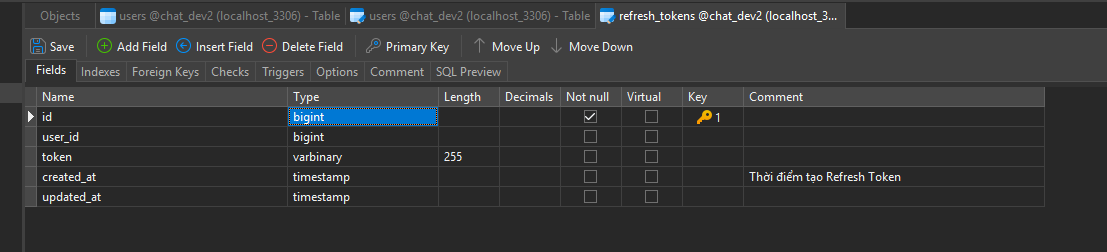

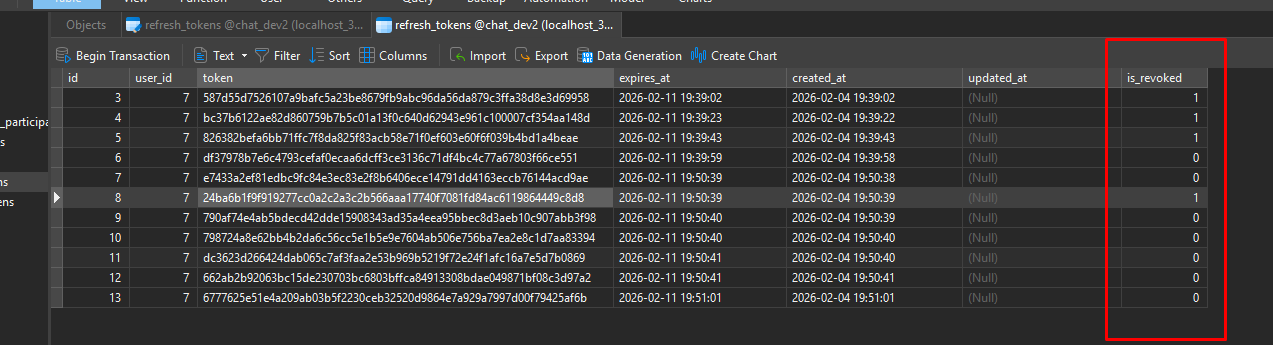

In [ ]:
- Mỗi một Refresh Token có thể coi là tượng trưng cho mỗi thiết bị khác nhau. Vậy nên kỹ thuật này Facebook sử dụng để biết được người dùng đã đăng nhập ở bao nhiêu thiết bị dựa vào đếm số lượng `refresh_token` trên `user_id` và `is_revoked = 0` là người ta biết được người dùng này đang đăng nhập trên bao nhiêu thiết bị.
- Chúng ta có nút đăng xuất --> đánh `is_revoked = 1`
- Tuy nhiên hiện tại code của chúng ta đánh `is_revoked = 1` thì sẽ không đăng xuất ngay, vì `access_token` vẫn còn trong thời gian sống. Nhưng khi `access_token` hết hạn rồi thì nó sẽ không thực hiện refresh được nữa (vì refresh Token lúc này đã chết)